# Technical notebook

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [4]:
!ls \data

winequality-red.csv winequality.names


In [5]:
df = pd.read_csv('data/winequality-red.csv', sep=';')
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [6]:
df.shape

(1599, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Target variable

In [8]:
df['quality'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [9]:
#create four categories:
df['quality'] = df['quality'].apply(lambda x: 5 if x<=5 else (7 if x>=7 else x))
df['quality'].value_counts().sort_index()

5    744
6    638
7    217
Name: quality, dtype: int64

In [10]:
df['quality'].value_counts(normalize=True).sort_index()

5    0.465291
6    0.398999
7    0.135710
Name: quality, dtype: float64

### EDA

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.670419
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.701915
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,5.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,7.000000


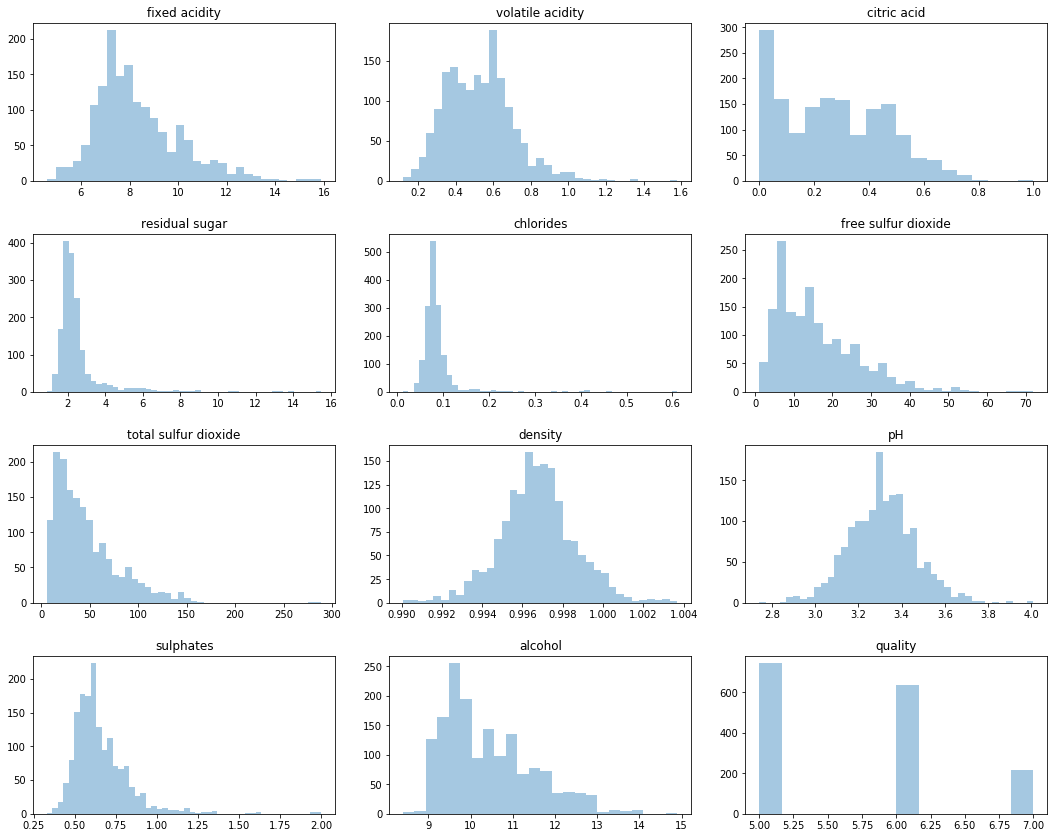

In [12]:
fig, axes = plt.subplots(4,3, figsize=(15,12))

for i, col in enumerate(df.columns.tolist(),1):
    ax = plt.subplot(4,3,i)
    sns.distplot(df[col], ax=ax, kde=False)
    ax.set_title(col)
    ax.set_xlabel('')
fig.tight_layout(pad=2.0)

### 1. Train test split

In [13]:
X = df.copy().drop(columns='quality')
y = df.copy().loc[:, 'quality']

feats = df.columns.tolist()[:-1]

print(X.shape)
print(y.shape)

(1599, 11)
(1599,)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1199, 11)
(400, 11)
(1199,)
(400,)


### 2. Scaling

In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 3. Logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight={5:0.46, 6:0.40, 7:0.14}, solver='saga', multi_class='multinomial')

In [159]:
from sklearn.model_selection import GridSearchCV

params = {'C': np.logspace(-2, 4, 7),
          'penalty' : ['l1','l2']}

log_grid = GridSearchCV(lr, params, scoring='accuracy', n_jobs=-1)

log_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0,
                                          class_weight={5: 0.46, 6: 0.4,
                                                        7: 0.14},
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs',

In [103]:
import sklearn.metrics
# sorted(sklearn.metrics.SCORERS.keys())

In [88]:
log_grid.best_estimator_

LogisticRegression(C=10.0, class_weight={5: 0.46, 6: 0.4, 7: 0.14}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l1', random_state=None, solver='saga', tol=0.0001,
                   verbose=0, warm_start=False)

In [89]:
log_grid.best_score_

0.6138598326359832

In [90]:
log_grid.best_estimator_.coef_

array([[-0.06792688,  0.52958025,  0.07237634, -0.01435448,  0.14040871,
        -0.29015341,  0.63604299,  0.        ,  0.14873055, -0.39704284,
        -0.76198963],
       [ 0.        ,  0.        , -0.26563917, -0.03496371,  0.04454347,
         0.04045892,  0.        ,  0.10484399, -0.05533022,  0.        ,
         0.08895072],
       [ 0.08702093, -0.39849697,  0.05781054,  0.18419443, -0.31547052,
         0.13007021, -0.58238749, -0.12722326,  0.        ,  0.45105774,
         0.53656203]])

In [91]:
log_grid.best_params_ #high C : no penalty

{'C': 10.0, 'penalty': 'l1'}

In [92]:
lr_model = log_grid.best_estimator_

In [250]:
y_pred = lr_model.predict(X_test)
y_prob = lr_model.predict_proba(X_test)

In [251]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6

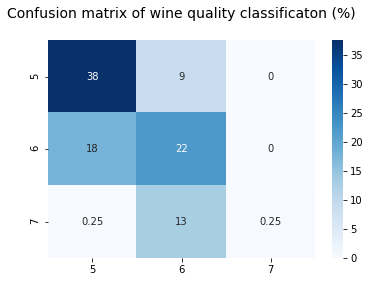

In [97]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/len(y_test)*100, cmap='Blues', annot=True, xticklabels=[5,6,7], yticklabels=[5,6,7])
ax = plt.gca()
plt.title('Confusion matrix of wine quality classificaton (%)\n', fontsize=14)
plt.xlabel('');

### KNN model

In [108]:
X_train.shape

(1199, 11)

In [109]:
y_train.shape

(1199,)

In [149]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

params = {'n_neighbors': list(range(3,30,2))}

knn_grid = GridSearchCV(knn, params, verbose=0, scoring='accuracy')

knn_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [150]:
knn_grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [151]:
knn_grid.best_score_

0.6196896792189679

In [152]:
list(zip(knn_grid.cv_results_['params'], knn_grid.cv_results_['rank_test_score']))

[({'n_neighbors': 3}, 13),
 ({'n_neighbors': 5}, 14),
 ({'n_neighbors': 7}, 12),
 ({'n_neighbors': 9}, 8),
 ({'n_neighbors': 11}, 5),
 ({'n_neighbors': 13}, 7),
 ({'n_neighbors': 15}, 2),
 ({'n_neighbors': 17}, 1),
 ({'n_neighbors': 19}, 2),
 ({'n_neighbors': 21}, 9),
 ({'n_neighbors': 23}, 11),
 ({'n_neighbors': 25}, 4),
 ({'n_neighbors': 27}, 10),
 ({'n_neighbors': 29}, 6)]

It shows us the ranking of the 'k' numbers. While we increase the k number, the accuracy improves until k=17, and after that the accuracy drops. It is an evidence, that the best result is k=17.

In [245]:
y_pred = knn_grid.predict(X_test)

In [246]:
print('test accuracy')
accuracy_score(y_test, y_pred)

test accuracy


0.6125

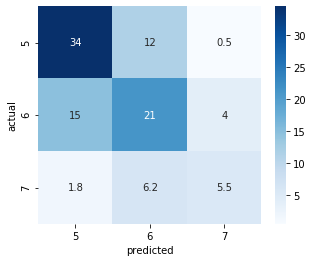

In [247]:
fig = plt.figure(figsize=(5,4))
cm_knn = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_knn/len(y_test)*100, cmap='Blues', annot=True, xticklabels=[5,6,7], yticklabels=[5,6,7])
plt.xlabel('predicted')
plt.ylabel('actual');

### Random forest

In [237]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'n_estimators' :[100, 200, 150],
    'criterion':['gini', 'entropy'],
    'max_depth':[2,3,4],  'max_features':[2,3,4]}

rf = RandomForestClassifier(min_samples_split=3,
    min_samples_leaf= 5,
    min_weight_fraction_leaf=0.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.1,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=True,
    n_jobs=None,
    random_state=56,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None)

rf_grid = GridSearchCV(rf, params_rf, n_jobs=-1) 
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.1,
                                              min_impurity_split=None,
                                              min_samples_leaf=5,
                                              min_samples_split=3,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=True, random_state=56,
                                

In [238]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=2, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=56, verbose=0,
                       warm_start=False)

In [239]:
y_train_pred = rf_grid.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.5813177648040033

In [240]:
y_pred = rf_grid.predict(X_test)

In [241]:
accuracy_score(y_test, y_pred)

0.5725

Text(33.0, 0.5, 'actual')

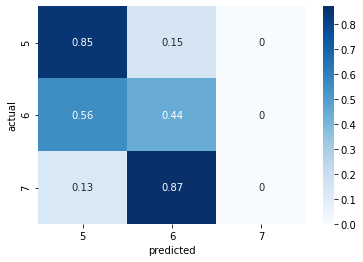

In [242]:
cm_rf = confusion_matrix(y_test, y_pred, labels=[5,6,7], normalize='true')
sns.heatmap(cm_rf, cmap='Blues', annot=True
            ,xticklabels=[5,6,7]
            ,yticklabels=[5,6,7])
plt.xlabel('predicted')
plt.ylabel('actual')

In [249]:
y_test.value_counts()

5    186
6    160
7     54
Name: quality, dtype: int64